In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.1f}'.format

#https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
df_audi = pd.read_csv("audi.csv")
df_bmw = pd.read_csv("audi.csv")
df_cclass = pd.read_csv("cclass.csv")
df_focus = pd.read_csv("focus.csv")
df_ford = pd.read_csv("ford.csv")
df_hyundai = pd.read_csv("hyundai.csv")
df_hyundai = df_hyundai.rename(columns={"tax(£)":"tax"}) #칼럼명 변경
df_merc = pd.read_csv("merc.csv")
df_skoda = pd.read_csv("skoda.csv")
df_toyota = pd.read_csv("toyota.csv")
df_vauxhall = pd.read_csv("vauxhall.csv")
df_vw = pd.read_csv("vw.csv")

#데이터 하나로 합치기
df_list = [df_audi, df_bmw, df_cclass, df_focus, df_ford, df_hyundai, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw]
df = pd.concat(df_list, ignore_index=True)

# print("dtypes:", df.dtypes)
# print("describe:", df.describe())

print(df.shape)
df.sample(10)

(108427, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13271,A3,2017,18995,Semi-Auto,28522,Diesel,30.0,61.4,2.0
73967,Yaris,2015,6998,Manual,45357,Petrol,30.0,55.0,1.3
84530,Astra,2017,9188,Manual,24085,Petrol,125.0,51.4,1.4
83433,Astra,2019,13498,Manual,11890,Petrol,150.0,47.9,1.4
61153,E Class,2019,49000,Semi-Auto,9722,Petrol,145.0,32.1,3.0
53774,GLC Class,2016,28998,Semi-Auto,16742,Diesel,145.0,56.5,2.1
28649,Focus,2016,10295,Manual,38113,Diesel,NaN,NaN,1.5
106884,Touareg,2016,21722,Automatic,52186,Diesel,235.0,42.8,3.0
68026,Octavia,2019,20520,Semi-Auto,10,Diesel,145.0,53.3,2.0
53282,Tucson,2017,14966,Manual,24963,Diesel,150.0,61.4,1.7


In [2]:
#베이스라인 모델 만들기
predict = df["price"].mean()
y_train = df["price"]

# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 7028.23


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


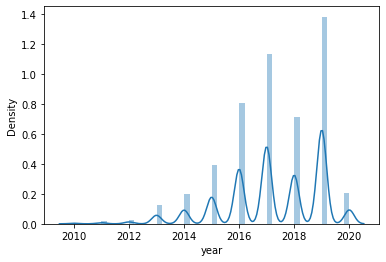

In [22]:
sns.distplot(df['year'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


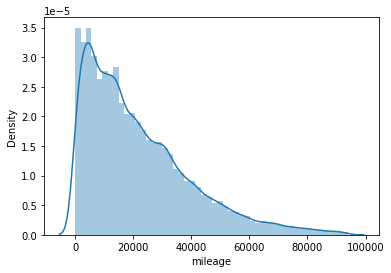

In [21]:
sns.distplot(df['mileage'], kde=True, rug=False)

16540.26104521726


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


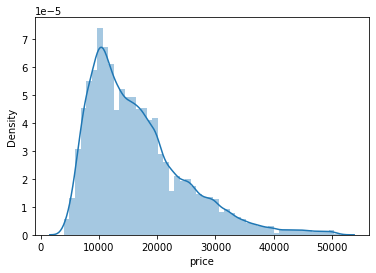

In [46]:
print(df['price'].mean())
sns.distplot(df['price'], kde=True, rug=False)

In [19]:
#이상치 제거
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) &
        (df['mileage'] >= np.percentile(df['mileage'], 0.5)) & 
        (df['mileage'] <= np.percentile(df['mileage'], 99.5)) &
        (df['engineSize'] >= np.percentile(df['engineSize'], 0.5)) & 
        (df['engineSize'] <= np.percentile(df['engineSize'], 99.5)) &
        (df['year'] >= np.percentile(df['year'], 0.5)) & 
        (df['year'] <= np.percentile(df['year'], 99.5))]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


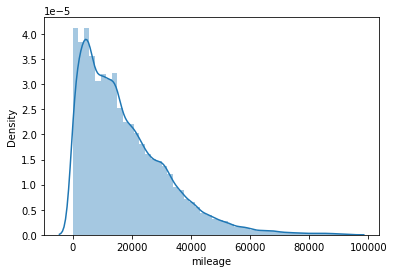

In [33]:
sns.distplot(df[(df['year']>2015)]['mileage'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


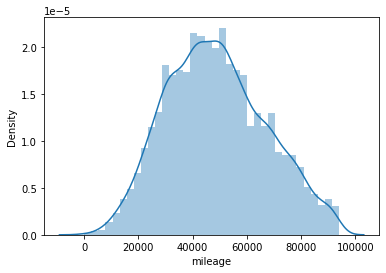

In [34]:
sns.distplot(df[(df['year']>2009)&(df['year']<2015)]['mileage'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


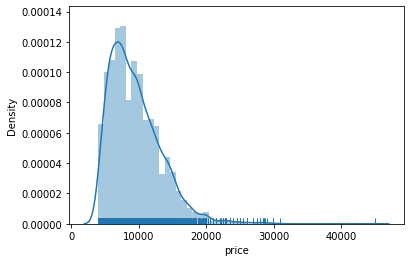

In [44]:
sns.distplot(df[(df['price']<=16500)&(df['mileage']>50000)]['price'], kde=True, rug=True)